# Preprocesado de datos

## Tratar con datos ausentes

Las bases de datos de fenomenos reales suelen presentar valores faltantes por diversas razones, como por ejemplo, datos dejados como vacios en encuestas, valores no medibles, errores al ingresar la informacion, entreo otros. Es bastante normal encontrar este tipo de valores, y sin embargo pueden representar un serio problema a la hora de ingresarlos a los algoritmos de prediccion o clasificacion. En python los valores faltantes se conocen y observan como `NaN`, y en bases de datos relacionales, se conocen como `NULL`.

In [1]:
# Creando un conjunto de datos de ejemplo (None)
# ====================================================
import pandas as pd
import numpy as np
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


### Reconocer que hay valores NaN

In [2]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [3]:
# Con el parametro axis se modifica sobre quien se hace la suma. Por defecto: axis = 0
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df2 = pd.read_csv('train.csv')
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df3 = pd.read_csv('titanic.csv')
df3.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


https://www.kaggle.com/c/titanic/data?select=train.csv

In [6]:
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
len(df3)

891

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Tratar con los valores NaN

#### Eliminar las muestras

In [10]:
df.head()

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [11]:
df.dropna(axis = 0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [12]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [13]:
df.dropna(how = 'all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [14]:
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [15]:
df.dropna(subset = ['D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0


#### Imputar las muestras

In [16]:
# imputacion por medias
# ===================================================
dfN = df.copy()
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values = np.nan, strategy='mean')
imr.fit(dfN.values)
dfN = imr.transform(dfN)
dfN

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

Lo anterior solo funciona para caracteristicas numericas; para caracteristicas categoricas existe la opcion `strategy='most_frequent'`, la cyal tomara la caracteristica mas frecuente para reemplazar los valores NaN.

In [17]:
imr = SimpleImputer(strategy = 'most_frequent')
df3N = imr.fit_transform(df3.values)
a = pd.DataFrame(df3N)
a.columns = df3.columns
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24,1,2,W./C. 6607,23.45,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


## Trabajar con datos categoricos

Muchas bases de datos contienen tipos de datos categoricos referentes a cualidades, tallas, generos, etc. Este tipo de datos puede interferir en los algoritmos de aprendizaje automatico, y aunque varios de ellos tienen funciones implicitas para tratar con ellos, se considera buena practica el realizar su tratamiento previo a enviarlos a los algotirmos de aprendizaje.

Para esto, hemos de reconocer que existen dos tipos de datos categoricos:

**Ordinales**: Son aquellos que se pueden ordenar de mayor a menor, por ejemplo las tallas de la ropa.

**Nominales**: Son aquellos que no se pueden ordenar, ejemplo, los colores.

In [18]:
# Datos de ejemplo
# =====================================
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Mapear caracteristicas ordinales

En el anterior ejemplo, debemos asegurarnos de que los datos de la columna `size` sean transformados a enteros, pero de tal forma que se reconozca el orden implicito en ellos. No existe una libreria o implementacion que reconozca dicho orden, pero es un tema relativamente facil de resolver

In [19]:
# Mapeando los valores categoricos a enteros
# ==================================================
size_mapping = {'XL': 3, 'L': 2, 'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [20]:
# Realizando un mapeo inverso
# =======================================================
inv_size_mapping = {v: k for k, v in size_mapping.items()}
#inv_size_mapping
#size_mapping.items()
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### Mapear etiquetas de clase

In [21]:
# Metodo 1: Asignar las etiquetas de clase "manualmente"
# =======================================================================
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [22]:
# Mapeando los valores categoricos a enteros
# ==================================================
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [23]:
# Realizando un mapeo inverso
# =======================================================
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [24]:
# Metodo 2: Usando una libreria dedicada a la codificacion
# ======================================================
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [25]:
# Realizando la transformacion inversa
# ======================================================
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

### Mapear caracteristicas nominales: "Codificacion en caliente"

En la seccion anterior, transformamos las etiquetas de clase nominales a enteros utilizando `LabelEncoder`; el resultado fue la asignacion de numeros enteros de 0 en adelante a las etiquetas de clase. Esto es aceptable ya que las etiquetas de clase no participan en la seleccion de caracteristicas para el modelo, ni en la actualizacion de los pesos, por lo tanto no es importante si una resulta ser calificada como mayor a las otras, aunque en realidad no lo sea.

Otro es el caso cuando se busca la codificacion de caracteristicas nominales, pues estas si participan en el proceso de seleccion de las etiquetas, y por lo tanto el que sean ordenables puede ser erronamente indicativo para el modelo, realizando una mala interpretacion de la relacion de los datos.

In [36]:
X = df[['color', 'size', 'price']].values
X

KeyError: "None of [Index(['color', 'size', 'price'], dtype='object')] are in the [columns]"

In [27]:
# No hacer esto
# ===================================================
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [28]:
# Codificacion en caliente
# Se crearan objetos del tipo (blue, green, red), de tal forma que blue sera: (1, 0, 0) : variable dummy
# ===================================
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = make_column_transformer((OneHotEncoder(drop = 'first'), [0]), remainder = 'passthrough')
Xn = ohe.fit_transform(X)
Xn

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

Es importante tener en cuenta que las caracteristicas asi codificadas son redundantes, lo que implica la prescencia de colinealidad entre las caracteristicas. Lo adecuado, ademas de lo ya hecho, es incluir el parametro `drop = 'first'` dentro de la declaracion del codificador : `OneHotEncoder(drop = 'first')`, y asi se eliminara la primera columna, previniendo entonces este posible error.

In [29]:
# Codificacion en caliente usando pandas :)
# ======================================================
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [30]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


## Dividir el conjunto de datos en entrenamiento y test

## Ajustar las caracteristicas a las misma escala

Recordemos que el escalado se realiza para que las caracteristicas sean comparables, y por lo tanto que todas sean significativas para el modelo. Los algoritmos de arboles de decision y bosques aleatorios son invariantes frente al escalado, pero la gran mayoria de algorritmos si se ven beneficiados de esta practica.

Existen dos enfoques principales para escalar carateriticas:

**Escalado min-max**: Normaliza los datos, es decir, los lleva a valores entre 0 y 1.

$$x_{norm}^{(i)} = \frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}$$

In [37]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
XN= mms.fit_transform(X[:, 1:])
XN

array([[0.65174393, 1.        ],
       [0.76197173, 0.94089337],
       [0.37957895, 0.8646636 ],
       [0.51299839, 0.81223513],
       [0.30532804, 0.77613557],
       [0.3694479 , 0.76912588],
       [0.73016111, 0.27071031],
       [0.71745725, 0.68649342],
       [0.74173276, 0.66049977],
       [0.43692884, 0.64644319],
       [0.45150637, 0.48573267],
       [0.30836422, 0.52936195],
       [0.57883556, 0.52956308],
       [0.64106561, 0.53555202],
       [0.8013272 , 0.54370828],
       [0.54302973, 0.55486446],
       [0.53527036, 0.56031151],
       [0.71401273, 0.59894835],
       [0.47877201, 0.62511553],
       [0.77823604, 0.        ],
       [0.47642362, 0.63305328],
       [0.78021012, 0.63532724],
       [0.54429273, 0.64291963],
       [0.4146383 , 0.64599195],
       [0.3653876 , 0.29796428],
       [0.67195793, 0.29242745],
       [0.70684477, 0.28413435],
       [0.58297807, 0.74861321],
       [1.        , 0.25042853],
       [0.77456642, 0.22709197],
       [0.

**Estandarizacion**: Transforma los datos a una distribucion normal estandar. Mas adecuado para los algoritmos de aprendizaje automatico.

$$x_{std}^{(i)} = \frac{x^{(i)}-\mu_x}{\sigma_x}$$

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XN = sc.fit_transform(X[:, 1:])
XN

array([[ 5.60752915e-01,  2.15394309e+00],
       [ 1.08280658e+00,  1.92360040e+00],
       [-7.28257028e-01,  1.62652767e+00],
       [-9.63646307e-02,  1.42221024e+00],
       [-1.07991935e+00,  1.28152771e+00],
       [-7.76239071e-01,  1.25421046e+00],
       [ 9.32147208e-01, -6.88149930e-01],
       [ 8.71980011e-01,  9.32185978e-01],
       [ 9.86952101e-01,  8.30886909e-01],
       [-4.56640246e-01,  7.76107440e-01],
       [-3.87599089e-01,  1.49807267e-01],
       [-1.06553960e+00,  3.19833623e-01],
       [ 2.15449064e-01,  3.20617441e-01],
       [ 5.10178953e-01,  3.43956788e-01],
       [ 1.26919939e+00,  3.75742273e-01],
       [ 4.58678535e-02,  4.19218702e-01],
       [ 9.11841968e-03,  4.40446224e-01],
       [ 8.55666318e-01,  5.91016724e-01],
       [-2.58465367e-01,  6.92992062e-01],
       [ 1.15983657e+00, -1.74312698e+00],
       [-2.69587651e-01,  7.23925995e-01],
       [ 1.16918609e+00,  7.32787791e-01],
       [ 5.18495648e-02,  7.62375876e-01],
       [-5.

In [39]:
ex = np.array([0, 1, 2, 3, 4, 5])

standardized = (ex - ex.mean()) / ex.std()
normalized = (ex - ex.min()) / (ex.max() - ex.min())
index = np.arange(len(standardized))

pd.DataFrame({'standardized': standardized, 'normalized':normalized})

,standardized,normalized
0,-1.46385,0.0
1,-0.87831,0.2
2,-0.29277,0.4
3,0.29277,0.6
4,0.87831,0.8
5,1.46385,1.0


## Seleccionar las caracteristicas significativas

Recordemos que si el rendimiento en el conjunto de entrenamiento es mayor que el rendimiento en el conjunto de prueba, esto es un fuerte indicativo de sobreajuste; para tratar con esta situacion existen varias posibilidades:

* Recoger mas datos de entrenamiento.
* Introducir una penalizacion para la complejidad mediante la regularizacion.
* Elegir un modelo mas sencillo con menos parametros.
* Reducir la dimensionalidad de los datos. (Seleccionar caracteristicas significativas)

De todas ellas, la primera es usualmente la menos aplicable.

### Regularizaciones $L_1$ y $L_2$ como penalizacion contra la complejidad del modelo

En clases pasadas habiamos definido la regularizacion $L_2$ como penalizacion para reducir la complejidad de los modelos. La definicion matematica usada entonces fue:

$$L_2 = ||\textbf{w}||^2_2 = \sum_{j=1}^{m} w_j^2$$

La regularizacion $L_1$ se define como:

$$L_1 = ||\textbf{w}||_1 = \sum_{j=1}^{m} |w_j|$$

La regularizacion $L_1$ suele producir soluciones dispersas, es decir, con mayor prescencia de ceros que del resto de elementos. Esto puede ser util se tenemos muchas caracteristicas irrelevantes, y en ese sentido, la regularizacion $L_1$ puede ser util para la seleccion de caracteristicas significativas.

In [40]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [42]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver = 'liblinear', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [44]:
lr.intercept_

array([-1.26348573, -1.21585675, -2.37010703])

In [45]:
u = pd.DataFrame(lr.coef_)
u.columns = df_wine.columns[1:]
u

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.245948,0.180575,0.745073,-1.162714,0.000000,0.0,1.164848,0.0,0.0,0.000000,0.000000,0.552584,2.509783
1,-1.536696,-0.387593,-0.995024,0.364851,-0.059883,0.0,0.668230,0.0,0.0,-1.934227,1.232959,0.000000,-2.231962
2,0.135114,0.169869,0.357804,0.000000,0.000000,0.0,-2.432335,0.0,0.0,1.562535,-0.816911,-0.498069,0.000000


Recordar que le valor de entrada neta es definido como:

$$z = w_0x_0 + w_1x_1+w_2x_2+\dots+w_mx_m$$

$w_0$ corresponde a `lr.intercept_` y los $w_j$ con  $j>0$ corresponden a `lr.coef_`.

Si se quiere aumentar la dispersion de los coeficientes, es decir, que hayan mas coeficientes con valores $0$, loq ue podemos hacer es aumentar la fuerza de regularizacion, es decir, aumentar $\lambda$, o en termino del parametro $C$, disminuir el valor de $C$. Recordar que $C$ es el inverso de $\lambda$.

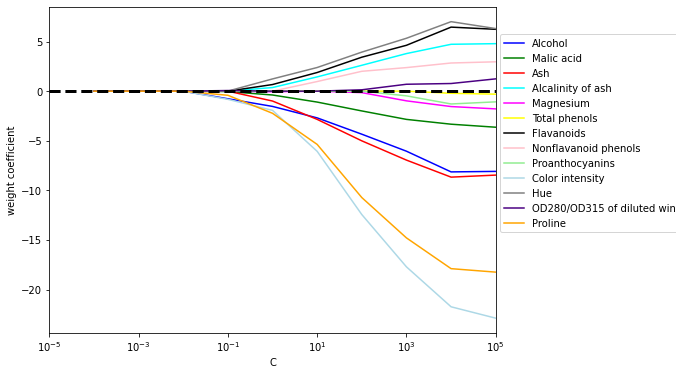

In [54]:
# Evaluando el comportamiento de los pesos segun se cambie el valor de C
# Recordar que los pesos, excepto $w_0$, se pueden obtener con .coef_
# ===============================================================================

import matplotlib.pyplot as plt
%matplotlib inline
ax, fig = plt.subplots(figsize = (8, 6))
    
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', solver = 'liblinear', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label = df_wine.columns[column + 1], color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(0.86, 0.8), ncol=1, fancybox=True)

### Algoritmos de seleccion de caracteristicas secuenciales

Una de las alternativas para reducir la complejidad del modelo y eviter el sobreajuste es la **reduccion de la dimensionalidad** mediante la seleccionde caracteristicas, muy util para modelos sin regularizar. Existen dos categorias principales de tecnicas de reduccion de la dimensionalidad: **seleccion de caracteristicas** y **extraccion de caracteristicas**. Mediante la primera seleccionamos un subconjunto de las caracteristicas originales, y mediante el segundo, generamos un nuevo subconjunto de caracteristicas por medio de la combinacion de caracteristicas originales.

Por ahora trabajaremos algoritmos de _seleccion de caracteristicas_.

En este tipo de algoritmos, se seleccionara un conjunto de caracteristicas de dimension $k$, con $k<d$, siendo $d$ las dimensiones de las caracteristicas originales. Esto se hace por diversas razones, las cuales incluyen la reduccion de la complejidad del modelo, el control del sobreajuste, la simplicidad computacional, entre otras.

#### Seleccion secuencial hacia tras (SBS)

Algoritmo de seleccion de caracteristicas cuyo objetivo es la reduccion de la dimensionalidad con un deterioro minimo del rendimiento; pueden darse casos en donde se mejora el rendimiento del modelo, gracias al control del sobreajuste.

La idea de este algoritmo es muy sencilla: SBS eliminara secuencialmente caracteristicas del espacio original hasta que solo quede el numero deseado de caracteristicas. Para definir que caracteristica se debe eliminar en cada etapa, debemos definir una _funcion de criterios_ $J$ que queremos maximizar. Los criterios calculados por $J$ pueden ser simplemente las diferencias entre los rendimientos del algoritmo antes y despues de la eliminacion. Entonces se seleccionara para eliminar la caracteristica que menor perdida de rendimiento produzca. Los pasos a seguir por el algoritmo seran los siguientes:

1. Inicializar el algoritmo con $k=d$; $\textbf{X}_d$ sera el espacio de caracteristicas.
2. Determinar la caracteristica $x^-$ que logra la menor perdida de rendimiento: $x^-=argmax\; J(\textbf{X}_{k}-\textbf{x})$ en donde $\textbf{x} \in \textbf{X}_k$.
3. Eliminar la caracteristica $x^-$ del conjunto de caracteristicas:

$$\textbf{X}_{k-1}=\textbf{X}_{k}-\textbf{x}^-; \; k=k-1$$

4. Acabar si $k$ iguala el numero de caracteristicas deseadas; si no, volver al paso 2.

Este algoritmo no se encuentra implementado en ninguna libreria de sklearn, pero es facil de implementar.

**Clone**: Construye un estimador nuevo no ajustado con los mismos parámetros. Clone hace una copia profunda del modelo en un estimador sin copiar los datos adjuntos. Produce un nuevo estimador con los mismos parámetros que no se ha ajustado a ningún dato.

**Combinations**: Devuelve combinaciones usando un iterable y un parametros
            
    combinations(_iterable_ , _parametro_ )
    
    combinations('ABCD', 2)  ----> AB AC AD BC BD CD

In [55]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = self.test_size)

        dim = X_train.shape[1] # Numero de columnas de la matriz X: m
        
        self.indices_ = tuple(range(dim)) # (0, 1, 2, ... , m-1)
        self.subsets_ = [self.indices_] # [(0, 1, 2, ..., m-1)]
        
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_) # Obtener score de X_test
        self.scores_ = [score] # [score]: score es un numero

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r = dim - 1): # Combina los indices en grupo de m - 1 al principio
                score = self._calc_score(X_train, y_train, X_test, y_test, p) # Esto es un numero
                scores.append(score)
                subsets.append(p) # p representa las caracteristicas seleccionadas por ciclo en tuplas

            best = np.argmax(scores) # obtengo el indice del mayor
            self.indices_ = subsets[best] # elijo las caracteristicas del mejor score
            self.subsets_.append(self.indices_) # Almaceno la tupla de los mejores indices
            dim -= 1 # Elimino una caracteristica

            self.scores_.append(scores[best]) # Almaceno los mejores scores por ciclo
        self.k_score_ = self.scores_[-1] # Adquiero el score asociado al numero de caracteristicas asociado

        return self

    def transform(self, X):
        return X[:, self.indices_] # solo retorno las k mejores caracteristicas 

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train);

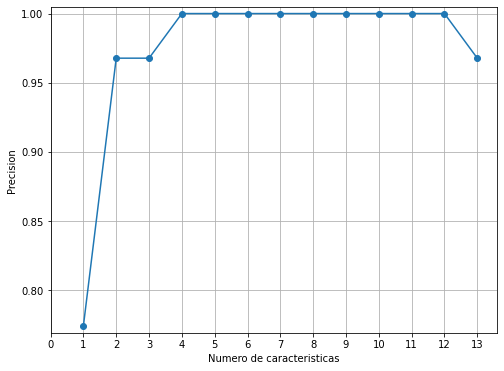

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8, 6))

k_feat = [len(k) for k in sbs.subsets_] # Cuantos indices hay por ciclo
y = sbs.scores_
plt.plot(k_feat, y, marker='o')
plt.ylim([min(y)-0.005, max(y)+0.005])
plt.ylabel('Precision')
plt.xlabel('Numero de caracteristicas')
plt.grid()
ax.set_xticks(np.arange(len(k_feat)+1));

In [59]:
k3 = list(sbs.subsets_[9])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash',
       'OD280/OD315 of diluted wines'],
      dtype='object')


In [60]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [61]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9354838709677419
Test accuracy: 0.9629629629629629


<span class="burk">EJERCICIOS</span>

1. Utilizando algun algoritmo de calsificacion, estudie las categorias del archivo `50_Startups.csv`. Esta vez no elimine las caracteristicas categoricas, sino mas bien codifiquelas. Lo ideal sera que utilice al menos dos algoritmos de clasificacion.
2. Utilizando algun algoritmo de clasificacion, estudie las categorias del archivo `car.csv`; sera necesario ademas que consulte el archivo `car.names`. Esta vez no elimine las caracteristicas categoricas, sino mas bien codifiquelas. Lo ideal sera que utilice al menos dos algoritmos de clasificacion. Tambien evalue si todas las caracteristicas son significativas usando los dos metodos vistos. Saque al menos dos conclusiones. Recuerde que para usar el metodo con al regularizacion `l1`, debe usar un algoritmo que acepte la regularizacion.

In [20]:
df5 = pd.read_csv('50_Startups.csv')

df5.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [63]:
from sklearn.model_selection import train_test_split

X = df5.iloc[:, [0,1,2,4]].values
y = df5.iloc[:, 3].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver = 'liblinear', C=0.001)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.42857142857142855
Test accuracy: 0.13333333333333333


In [105]:
df6 = pd.read_csv('car.csv',header=None)
df6.columns = ['buying', 'maint', 'doors', 'persons',
                   'lug_boot', 'safety','class']
df6.head()
df6.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [106]:
size_mapping = {'unacc': 4, 'acc': 3, 'good': 2,'v-good':1,'vgood':1}
size_mapping3 = {'low': 4, 'med': 3, 'high': 2,'vhigh':1}

df6['class'] = df6['class'].map(size_mapping)
df6['buying'] = df6['buying'].map(size_mapping3)
df6['maint'] = df6['maint'].map(size_mapping3)

size_mapping1 = {'low': 3, 'med': 2, 'high': 1}

df6['safety'] = df6['safety'].map(size_mapping1)

size_mapping2 = {'small': 3, 'med': 2, 'big': 1}

df6['lug_boot'] = df6['lug_boot'].map(size_mapping2)
df6



,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,2,2,3,3,4
1,1,1,2,2,3,2,4
2,1,1,2,2,3,1,4
3,1,1,2,2,2,3,4
4,1,1,2,2,2,2,4
...,...,...,...,...,...,...,...
1723,4,4,5more,more,2,2,2
1724,4,4,5more,more,2,1,1
1725,4,4,5more,more,1,3,4
1726,4,4,5more,more,1,2,2


In [107]:
from sklearn.model_selection import train_test_split

X = df6.iloc[:, [0,1,4,5]].values
y = df6.iloc[:, 6].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [109]:
X

array([[1, 1, 3, 3],
       [1, 1, 3, 2],
       [1, 1, 3, 1],
       ...,
       [4, 4, 1, 3],
       [4, 4, 1, 2],
       [4, 4, 1, 1]], dtype=int64)

In [110]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [111]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [113]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver = 'liblinear')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.7212572373862697
Test accuracy: 0.6994219653179191


In [114]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = self.test_size)

        dim = X_train.shape[1] # Numero de columnas de la matriz X: m
        
        self.indices_ = tuple(range(dim)) # (0, 1, 2, ... , m-1)
        self.subsets_ = [self.indices_] # [(0, 1, 2, ..., m-1)]
        
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_) # Obtener score de X_test
        self.scores_ = [score] # [score]: score es un numero

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r = dim - 1): # Combina los indices en grupo de m - 1 al principio
                score = self._calc_score(X_train, y_train, X_test, y_test, p) # Esto es un numero
                scores.append(score)
                subsets.append(p) # p representa las caracteristicas seleccionadas por ciclo en tuplas

            best = np.argmax(scores) # obtengo el indice del mayor
            self.indices_ = subsets[best] # elijo las caracteristicas del mejor score
            self.subsets_.append(self.indices_) # Almaceno la tupla de los mejores indices
            dim -= 1 # Elimino una caracteristica

            self.scores_.append(scores[best]) # Almaceno los mejores scores por ciclo
        self.k_score_ = self.scores_[-1] # Adquiero el score asociado al numero de caracteristicas asociado

        return self

    def transform(self, X):
        return X[:, self.indices_] # solo retorno las k mejores caracteristicas 

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train);

In [116]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.794044665012407
Test accuracy: 0.7630057803468208


In [121]:
k3 = list(sbs.subsets_[3])
print(df6.columns[1:][k3])

Index(['maint'], dtype='object')


In [122]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.7005789909015715
Test accuracy: 0.6994219653179191
